# End-to-end deep learning project using TenserFlow

# Deep Learning libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
import warnings

from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

# Data Augmentation

**The dataset consists of training data, validation data, and testing data. The training data consists of 5,216 chest x-ray images with 3,875 images shown to have pneumonia and 1,341 images shown to be normal. The validation data is relatively small with only 16 images with 8 cases of pneumonia and 8 normal cases. The testing data consists of 624 images split between 390 pneumonia cases and 234 normal cases.**

**The main point of augmenting data — or more specifically augmenting train data is that we are going to increase the number of data used for training by creating more samples with some sort of randomness on each of them. These randomnesses might include translations, rotations, scaling, shearing, and flips.**

In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/train',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
        '../input/chest-xray-pneumonia/chest_xray/test',
        target_size=(64, 64),
        batch_size=64,
        class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


**Show some images after data augmentation**

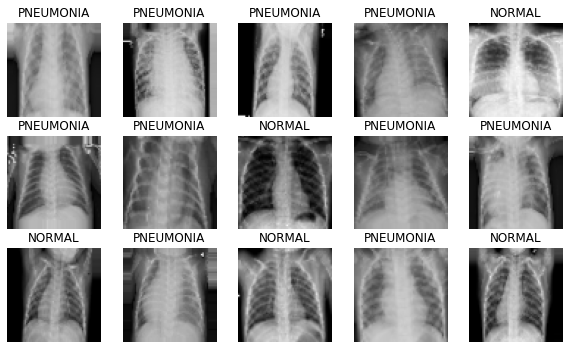

In [3]:
image_batch, label_batch = next(iter(train_generator))

def show_batch(image_batch, label_batch):
    plt.figure(figsize=(10, 10))
    for n in range(15):
        ax = plt.subplot(5, 5, n + 1)
        plt.imshow(image_batch[n])
        if label_batch[n]:
            plt.title("PNEUMONIA")
        else:
            plt.title("NORMAL")
        plt.axis("off")

show_batch(image_batch, label_batch)

**The shape of the images**

In [4]:
train_generator.image_shape 

(64, 64, 3)

**Classes of the images**

In [5]:
train_generator.class_indices 

{'NORMAL': 0, 'PNEUMONIA': 1}

# Define parameters

**The amount that the weights are updated during training is referred to as the step size or the “learning rate.the learning rate is a configurable hyperparameter used in the training of neural networks that has a small positive value.**

In [6]:
EPOCHS = 20
INIT_LR = 1e-3 
BS = 15 
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3

# Bulding Model Architecture

**The Keras Python library makes creating deep learning models fast and easy. The sequential API allows you to create models layer-by-layer for most problems. It is limited in that it does not allow you to create models that share layers or have multiple inputs or outputs.**

**There are several layers of convolutional networks these layers input which helps produce a tensor of outputs. For building this particular neural network, we are using a Max Pooling function and, Flattening is the process of converting all the resultant 2-dimensional arrays into a single long continuous linear vector. Dense uses to perform the full connection of the neural network. Then I will initialize the output layer which consists of the respective as desired.**

In [7]:
input_shape=(64,64,3)

In [8]:
model = tf.keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),  activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [9]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**Displaying model architecture**

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          3

# Training the model

In [11]:
model.fit(
        train_generator,
        steps_per_epoch=82,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=82)

Epoch 1/20
82/82 [==============================] - 101s 1s/step - loss: 0.6050 - accuracy: 0.7295 - val_loss: 0.4583 - val_accuracy: 0.7917
Epoch 2/20
82/82 [==============================] - 49s 596ms/step - loss: 0.4040 - accuracy: 0.8198
Epoch 3/20
82/82 [==============================] - 49s 603ms/step - loss: 0.2728 - accuracy: 0.8919
Epoch 4/20
82/82 [==============================] - 49s 599ms/step - loss: 0.2353 - accuracy: 0.9092
Epoch 5/20
82/82 [==============================] - 49s 600ms/step - loss: 0.2305 - accuracy: 0.9092
Epoch 6/20
82/82 [==============================] - 49s 596ms/step - loss: 0.2155 - accuracy: 0.9157
Epoch 7/20
82/82 [==============================] - 49s 596ms/step - loss: 0.2021 - accuracy: 0.9216
Epoch 8/20
82/82 [==============================] - 49s 596ms/step - loss: 0.1931 - accuracy: 0.9192
Epoch 9/20
82/82 [==============================] - 49s 599ms/step - loss: 0.1775 - accuracy: 0.9365
Epoch 10/20
82/82 [==============================] 

# Prediction and evaluate results

**Now let’s deep dive into the accuracy towards test data using the confusion matrix. First, we need to predict all the X_test and convert the result back from one-hot format to its actual categorical label.**

In [12]:
scores = model.evaluate(validation_generator)

print("Loss of the model: %.2f"%(scores[0]))
print("Test Accuracy: %.2f%%"%(scores[1] * 100))

10/10 [==============================] - 4s 438ms/step - loss: 0.3431 - accuracy: 0.9247
Loss of the model: 0.34
Test Accuracy: 92.47%


**Saving the model for future use**

In [13]:
model.save('pneumonia_model.h5')

**Making prediction for a single image**

[[0.9999926]]
This image is 100.00 percent PNEUMONIA


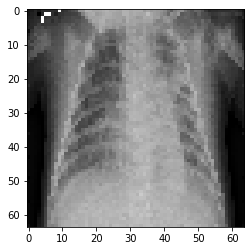

In [14]:
def predict_image(filename):
    img = load_img(filename, target_size=(64, 64))
    image = keras.preprocessing.image.img_to_array(img)
    image = image / 255.0
    image = image.reshape(1,64,64,3)
    model = tf.keras.models.load_model('pneumonia_model.h5')
    prediction = model.predict(image)
    print(prediction)
    plt.imshow(img)
    if(prediction[0] > 0.5):
        stat = prediction[0] * 100 
        print("This image is %.2f percent %s"% (stat, "PNEUMONIA"))
    else:
        stat = (1.0 - prediction[0]) * 100
        print("This image is %.2f percent %s" % (stat, "NORMAL"))

   
predict_image("../input/chest-xray-pneumonia/chest_xray/val/PNEUMONIA/person1946_bacteria_4874.jpeg")